In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from glob import glob

repoDir = "Data___Results_2021/"

In [2]:
df = pd.read_csv('section_4/cifar10/vgg11/vgg11_cifar10_sgd.csv')
#df=df[(df['relu'] > -1.1) &(df['relu'] < 1.1) ]
df=df[df['epoch'] == 199]
df = df.dropna(axis=0, how='any')

<Figure size 144x144 with 0 Axes>

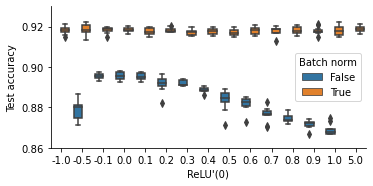

In [3]:

plt.figure(num=None, figsize=(2, 2), facecolor='w', edgecolor='k')
g = sns.catplot(x="relu", y="test_accuracy", hue="batch_norm", kind="box", data=df, height=2.5, aspect=2)
g._legend.remove()
plt.ylim(bottom=0.86, top=0.93)
plt.xlabel("ReLU'(0)")#, fontsize='25');
plt.ylabel('Test accuracy')#, fontsize='25');
plt.legend(title = "Batch norm")
plt.savefig('plots/cifarVGGTest.pdf', bbox_inches='tight')

In [4]:
df = pd.read_csv('section_4/cifar10/vgg11/vgg11_cifar10_sgd.csv')
df = df[df['batch_norm'] == False]
reluToKeep = [-1, -0.5, 0.0, 0.5, 1]
df = df[df.relu.isin(reluToKeep)]

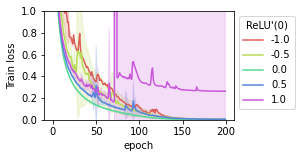

In [5]:


#sns.set_palette(sns.color_palette("Paired"))

sizeFig = 2

fig = plt.figure(num=None, figsize=(sizeFig*1.7, sizeFig), facecolor='w', edgecolor='k')
sns.lineplot(x="epoch", y="train_loss", hue="relu", ci= 'sd', 
             data=df, palette=sns.color_palette("hls", len(df['relu'].unique())))
plt.xlabel("epoch")#, fontsize='25');
plt.ylabel('Train loss')#, fontsize='25');
plt.legend(title = "ReLU'(0)", ncol=1, bbox_to_anchor=(1, 1))
plt.ylim(bottom=0, top=1)

plt.savefig('plots/cifarVGGTrain.pdf', bbox_inches='tight')

In [6]:
df = pd.read_csv('section_4/svhn/vgg11_svhn_adam.csv')
df=df[df['epoch'] == 99]
df = df.dropna(axis=0, how='any')

<Figure size 144x144 with 0 Axes>

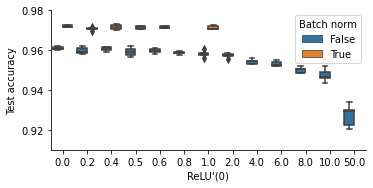

In [7]:
plt.figure(num=None, figsize=(2, 2), facecolor='w', edgecolor='k')
g = sns.catplot(x="relu", y="test_accuracy", hue="batch_norm", kind="box", data=df, height=2.5, aspect=2)
g._legend.remove()
plt.ylim(bottom=0.91, top=0.98)
plt.xlabel("ReLU'(0)")#, fontsize='25');
plt.ylabel('Test accuracy')#, fontsize='25');
plt.legend(title = "Batch norm")
plt.savefig('plots/SVHNVGGTest.pdf', bbox_inches='tight')

In [8]:
df = pd.read_csv('section_4/svhn/vgg11_svhn_adam.csv')
df = df[df['batch_norm'] == False]
reluToKeep = [0.0, 0.5, 1, 10]
df = df[df.relu.isin(reluToKeep)]

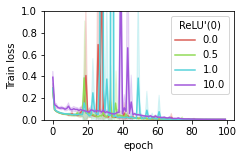

In [9]:

sizeFig = 2

fig = plt.figure(num=None, figsize=(sizeFig*1.7, sizeFig), facecolor='w', edgecolor='k')
sns.lineplot(x="epoch", y="train_loss", hue="relu", ci= 'sd', 
             data=df, palette=sns.color_palette("hls", len(df['relu'].unique())))
plt.xlabel("epoch")#, fontsize='25');
plt.ylabel('Train loss')#, fontsize='25');
plt.legend(title = "ReLU'(0)", ncol=1, bbox_to_anchor=(1, 1))
plt.ylim(bottom=0, top=1)

plt.savefig('plots/SVHNVGGTrain.pdf', bbox_inches='tight')

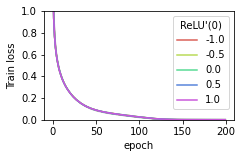

In [10]:
df = pd.read_csv('section_4/cifar10/vgg11/vgg11_cifar10_sgd.csv')
df = df[df['batch_norm'] == True]
reluToKeep = [-1, -0.5, 0.0, 0.5, 1]
df = df[df.relu.isin(reluToKeep)]

#sns.set_palette(sns.color_palette("Paired"))

sizeFig = 2

fig = plt.figure(num=None, figsize=(sizeFig*1.7, sizeFig), facecolor='w', edgecolor='k')
sns.lineplot(x="epoch", y="train_loss", hue="relu", ci= 'sd', 
             data=df, palette=sns.color_palette("hls", len(df['relu'].unique())))
plt.xlabel("epoch")#, fontsize='25');
plt.ylabel('Train loss')#, fontsize='25');
plt.legend(title = "ReLU'(0)", ncol=1, bbox_to_anchor=(1, 1))
plt.ylim(bottom=0, top=1)

plt.savefig('plots/cifarVGGTrainBatchNorm.pdf', bbox_inches='tight')


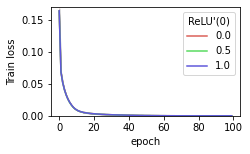

In [11]:
df = pd.read_csv('section_4/svhn/vgg11_svhn_adam.csv')
df = df[df['batch_norm'] == True]
reluToKeep = [0.0, 0.5, 1, 10]
df = df[df.relu.isin(reluToKeep)]


sizeFig = 2

fig = plt.figure(num=None, figsize=(sizeFig*1.7, sizeFig), facecolor='w', edgecolor='k')
sns.lineplot(x="epoch", y="train_loss", hue="relu", ci= 'sd', 
             data=df, palette=sns.color_palette("hls", len(df['relu'].unique())))
plt.xlabel("epoch")#, fontsize='25');
plt.ylabel('Train loss')#, fontsize='25');
plt.legend(title = "ReLU'(0)", ncol=1, bbox_to_anchor=(1, 1))
plt.ylim(bottom=0, top=0.17)

plt.savefig('plots/SVHNVGGTrainBatchNorm.pdf', bbox_inches='tight')

In [12]:
def plot_volume_estimation(df, max_size, batch_norm=False, batch_size=128):
    
    df = df[df['batchnorm']==batch_norm]
    
    df32 = df[df['precision'] == 32]
    max_len = len(df32.run_id.unique())
    df32 = df32[['batch_idx', 'same']].groupby(['batch_idx']).sum().reset_index()
    
    df32['div'] = (max_len-df32['same'])/max_len
    for i in range(df32.batch_idx.count(), max_size):
        df32 = df32.append({"div": 1.,
                            "same": max_len,
                            "batch_idx": i}, ignore_index=True)
    df32['batch_idx'] = df32['batch_idx'] * batch_size
    
    df16 = df[df['precision'] == 16]
    max_len = len(df16.run_id.unique())
    df16 = df16[['batch_idx', 'same']].groupby(['batch_idx']).sum().reset_index()
    
    df16['div'] = (max_len-df16['same'])/max_len
    for i in range(df16.batch_idx.count(), max_size):
        df16 = df16.append({"div": 1.,
                            "same": max_len,
                            "batch_idx": i}, ignore_index=True)
    df16['batch_idx'] = df16['batch_idx'] * batch_size
    df16 = df16.astype({"div":float})
    df32 = df32.astype({"div":float})
    
    sizeFig=1.5
    plt.figure(figsize=(sizeFig*1.7, sizeFig))
    plt.plot(df32['batch_idx'], df32['div'].values, label='32b')
    plt.plot(df16['batch_idx'], df16['div'].values, label='16b')
    plt.fill_between(df32['batch_idx'].values, df32['div'].values)
    plt.fill_between(df32['batch_idx'].values, df16['div'].values,df32['div'].values)
    leg = plt.legend(title="Precision", borderpad=0.4, borderaxespad=0.,handlelength=0.7)#, fontsize='25', title_fontsize='25')
    plt.xlabel('sample size')#, fontsize='25');
    plt.ylabel(r'$P(\theta \in S_{01})$')#, fontsize='30');plt.yticks(fontsize='25');
    #plt.xticks(fontsize='25');
    for line in leg.get_lines():
        line.set_linewidth(10.0)

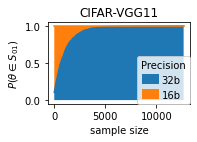

In [13]:
df = pd.read_csv('section_4/cifar10/vgg11/volume_estimation_sample_vgg11.csv')
plot_volume_estimation(df, 100, batch_norm=False)
plt.title("CIFAR-VGG11")
plt.savefig('plots/cifarVGGVolNoBatch.pdf', bbox_inches='tight')

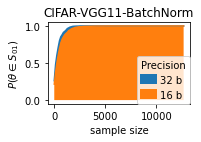

In [14]:
def plot_volume_estimation(df, max_size, batch_norm=False, batch_size=128):
    
    df = df[df['batchnorm']==batch_norm]
    
    df32 = df[df['precision'] == 32]
    max_len = len(df32.run_id.unique())
    df32 = df32[['batch_idx', 'same']].groupby(['batch_idx']).sum().reset_index()
    
    df32['div'] = (max_len-df32['same'])/max_len
    for i in range(df32.batch_idx.count(), max_size):
        df32 = df32.append({"div": 1.,
                            "same": max_len,
                            "batch_idx": i}, ignore_index=True)
    df32['batch_idx'] = df32['batch_idx'] * batch_size
    
    df16 = df[df['precision'] == 16]
    max_len = len(df16.run_id.unique())
    df16 = df16[['batch_idx', 'same']].groupby(['batch_idx']).sum().reset_index()
    
    df16['div'] = (max_len-df16['same'])/max_len
    for i in range(df16.batch_idx.count(), max_size):
        df16 = df16.append({"div": 1.,
                            "same": max_len,
                            "batch_idx": i}, ignore_index=True)
    df16['batch_idx'] = df16['batch_idx'] * batch_size
    df16 = df16.astype({"div":float})
    df32 = df32.astype({"div":float})
    
    sizeFig=1.5
    plt.figure(figsize=(sizeFig*1.7, sizeFig))
    #plt.plot(df16['batch_idx'], df16['div'].values, label='16b')
    #plt.plot(df32['batch_idx'], df32['div'].values, label='32b')
    #plt.fill_between(df32['batch_idx'].values, df32['div'].values)
    #plt.fill_between(df32['batch_idx'].values, df16['div'].values,df32['div'].values)
    
    plt.plot(df32['batch_idx'], df32['div'].values, label='32 b')
    plt.plot(df16['batch_idx'], df16['div'].values, label='16 b')
    plt.fill_between(df16['batch_idx'].values, df32['div'].values,df16['div'].values)
    plt.fill_between(df16['batch_idx'].values, df16['div'].values)
    
    leg = plt.legend(title="Precision", borderpad=0.4, borderaxespad=0.,handlelength=0.7)#, fontsize='25', title_fontsize='25')
    plt.xlabel('sample size')#, fontsize='25');
    plt.ylabel(r'$P(\theta \in S_{01})$')#, fontsize='30');plt.yticks(fontsize='25');
    #plt.xticks(fontsize='25');
    for line in leg.get_lines():
        line.set_linewidth(10.0)


df = pd.read_csv('section_4/cifar10/vgg11/volume_estimation_sample_vgg11.csv')
plot_volume_estimation(df, 100, batch_norm=True)
plt.title("CIFAR-VGG11-BatchNorm")
plt.savefig('plots/cifarVGGVolBatch.pdf', bbox_inches='tight')

In [15]:
def plot_volume_estimation(df, max_size, batch_norm=False):
    
    df = df[df['batchnorm']==batch_norm]
    
    df64 = df[df['precision'] == 64]
    max_len = len(df64.run_id.unique())
    df64 = df64[['idx', 'same']].groupby(['idx']).sum().reset_index()
    
    df64['div'] = (max_len-df64['same'])/max_len
    for i in range(df64.idx.count(), max_size):
        df64 = df64.append({"div": 1.,
                            "same": max_len,
                            "idx": i}, ignore_index=True)
    df64['idx'] = df64['idx'] *128
    
    df32 = df[df['precision'] == 32]
    max_len = len(df32.run_id.unique())
    df32 = df32[['idx', 'same']].groupby(['idx']).sum().reset_index()
    
    df32['div'] = (max_len-df32['same'])/max_len
    for i in range(df32.idx.count(), max_size):
        df32 = df32.append({"div": 1.,
                            "same": max_len,
                            "idx": i}, ignore_index=True)
    df32['idx'] = df32['idx'] *128
    df32 = df32.astype({"div":float})
    df64 = df64.astype({"div":float})
    
    sizeFig=1.5
    plt.figure(figsize=(sizeFig*1.7, sizeFig))
    plt.plot(df64['idx'], df64['div'].values, label='64 b', color = '#2ca02c')
    plt.plot(df32['idx'], df32['div'].values, label='32 b', color = '#1f77b4')
    plt.fill_between(df64['idx'].values, df64['div'].values)
    plt.fill_between(df64['idx'].values, df32['div'].values,df64['div'].values, color = '#1f77b4')
    
    leg = plt.legend(title="Precision", borderpad=0.4, borderaxespad=0.,handlelength=0.7)#, fontsize='25', title_fontsize='25')
    plt.xlabel('sample size')#, fontsize='25');
    plt.ylabel(r'$P(\theta \in S_{01})$')#, fontsize='30');plt.yticks(fontsize='25');
    
    for line in leg.get_lines():
        line.set_linewidth(10.0)

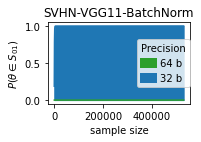

In [16]:
df = pd.read_csv('section_4/svhn/volume_estimation_sample_vgg11_svhn.csv')
df = df.rename(columns={'batch_idx': 'idx'})
plot_volume_estimation(df, 4150, batch_norm=False)
plt.title("SVHN-VGG11-BatchNorm")#, fontsize='25')
plt.savefig('plots/SVHNVGGVolNoBatch.pdf', bbox_inches='tight')

In [17]:
df = pd.read_csv('section_4/cifar10/resnet18/resnet18_cifar10_sgd.csv')
df=df[df['epoch'] == 199]
df = df.dropna(axis=0, how='any')

<Figure size 144x144 with 0 Axes>

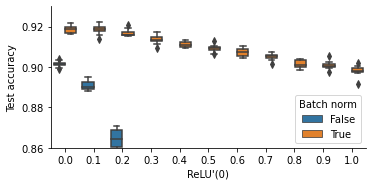

In [18]:


plt.figure(num=None, figsize=(2, 2), facecolor='w', edgecolor='k')
g = sns.catplot(x="relu", y="test_accuracy", hue="batch_norm", kind="box", data=df, height=2.5, aspect=2)
g._legend.remove()
plt.ylim(bottom=0.86, top=0.93)
plt.xlabel("ReLU'(0)")#, fontsize='25');
plt.ylabel('Test accuracy')#, fontsize='25');
plt.legend(title = "Batch norm")
plt.savefig('plots/cifarResTest.pdf', bbox_inches='tight')


In [19]:
df = pd.read_csv('section_4/cifar10/resnet18/resnet18_cifar10_sgd.csv')
df = df[df['batch_norm'] == False]
reluToKeep = [0.0, 0.1, 0.2]
df = df[df.relu.isin(reluToKeep)]

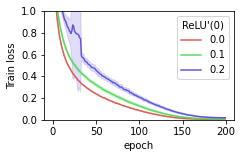

In [20]:
#sns.set_palette(sns.color_palette("Paired"))

sizeFig = 2

fig = plt.figure(num=None, figsize=(sizeFig*1.7, sizeFig), facecolor='w', edgecolor='k')
sns.lineplot(x="epoch", y="train_loss", hue="relu", ci= 'sd', 
             data=df, palette=sns.color_palette("hls", len(df['relu'].unique())))
plt.xlabel("epoch")#, fontsize='25');
plt.ylabel('Train loss')#, fontsize='25');
plt.legend(title = "ReLU'(0)", ncol=1, bbox_to_anchor=(1, 1))
plt.ylim(bottom=0, top=1)

plt.savefig('plots/cifarResTrain.pdf', bbox_inches='tight')


In [21]:
df = pd.read_csv('section_4/cifar10/resnet18/resnet18_cifar10_sgd.csv')
df = df[df['batch_norm'] == True]
#reluToKeep = [0.0, 0.1, 0.2]
#df = df[df.relu.isin(reluToKeep)]


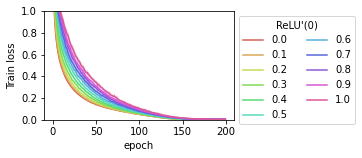

In [22]:

sizeFig = 2

fig = plt.figure(num=None, figsize=(sizeFig*1.7, sizeFig), facecolor='w', edgecolor='k')
sns.lineplot(x="epoch", y="train_loss", hue="relu", ci= 'sd', 
             data=df, palette=sns.color_palette("hls", len(df['relu'].unique())))
plt.xlabel("epoch")#, fontsize='25');
plt.ylabel('Train loss')#, fontsize='25');
plt.legend(title = "ReLU'(0)", ncol=2, bbox_to_anchor=(1, 1))
plt.ylim(bottom=0, top=1)

plt.savefig('plots/cifarResTrainBatch.pdf', bbox_inches='tight')


In [23]:
def plot_volume_estimation(df, max_size, batch_norm=False):
    
    df = df[df['batchnorm']==batch_norm]
    
    df32 = df[df['precision'] == 32]
    max_len = len(df32.run_id.unique())
    df32 = df32[['batch_idx', 'same']].groupby(['batch_idx']).sum().reset_index()
    
    df32['div'] = (max_len-df32['same'])/max_len
    for i in range(df32.batch_idx.count(), max_size):
        df32 = df32.append({"div": 1.,
                            "same": max_len,
                            "batch_idx": i}, ignore_index=True)
    df32['batch_idx'] = df32['batch_idx'] *128
    
    df16 = df[df['precision'] == 16]
    max_len = len(df16.run_id.unique())
    df16 = df16[['batch_idx', 'same']].groupby(['batch_idx']).sum().reset_index()
    
    df16['div'] = (max_len-df16['same'])/max_len
    for i in range(df16.batch_idx.count(), max_size):
        df16 = df16.append({"div": 1.,
                            "same": max_len,
                            "batch_idx": i}, ignore_index=True)
    df16['batch_idx'] = df16['batch_idx'] *128
    df16 = df16.astype({"div":float})
    df32 = df32.astype({"div":float})
    
    sizeFig=1.5
    plt.figure(figsize=(sizeFig*1.7, sizeFig))
    plt.plot(df32['batch_idx'], df32['div'].values, label='32b')
    plt.plot(df16['batch_idx'], df16['div'].values, label='16b')
    plt.fill_between(df32['batch_idx'].values, df32['div'].values)
    plt.fill_between(df32['batch_idx'].values, df16['div'].values,df32['div'].values)
    leg = plt.legend(title="Precision", borderpad=0.4, borderaxespad=0.,handlelength=0.7)#, fontsize='25', title_fontsize='25')
    plt.xlabel('sample size')#, fontsize='25');
    plt.ylabel(r'$P(\theta \in S_{01})$')#, fontsize='30');plt.yticks(fontsize='25');
    
    for line in leg.get_lines():
        line.set_linewidth(10.0)



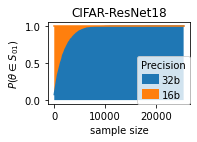

In [24]:
df = pd.read_csv('section_4/cifar10/resnet18/volume_estimation_sample_resnet18.csv')

plot_volume_estimation(df, 200, batch_norm=False)
plt.title("CIFAR-ResNet18")
plt.savefig('plots/cifarResVolNoBatch.pdf', bbox_inches='tight')

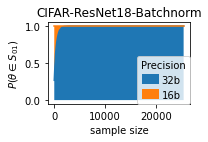

In [25]:
plot_volume_estimation(df, 200, batch_norm=True)
plt.title("CIFAR-ResNet18-Batchnorm")
plt.savefig('plots/cifarResVolBatch.pdf', bbox_inches='tight')

In [26]:
df = pd.read_csv('section_4/cifar10/vgg11/vgg11_cifar10_adam.csv')
df=df[df['epoch'] == 199]
df = df.dropna(axis=0, how='any')

<Figure size 144x144 with 0 Axes>

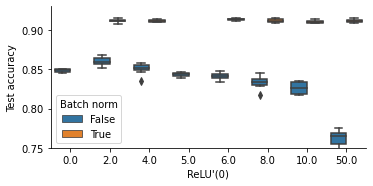

In [27]:


plt.figure(num=None, figsize=(2, 2), facecolor='w', edgecolor='k')
g = sns.catplot(x="relu", y="test_accuracy", hue="batch_norm", kind="box", data=df, height=2.5, aspect=2)
g._legend.remove()
plt.ylim(bottom=0.75, top=0.93)
plt.xlabel("ReLU'(0)")#, fontsize='25');
plt.ylabel('Test accuracy')#, fontsize='25');
plt.legend(title = "Batch norm")
plt.savefig('plots/CifarVGGAdamTest.pdf', bbox_inches='tight')


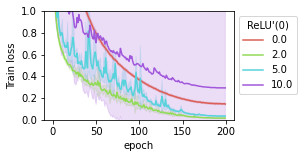

In [28]:
df = pd.read_csv('section_4/cifar10/vgg11/vgg11_cifar10_adam.csv')
df = df[df['batch_norm'] == False]
reluToKeep = [0.0, 2.0, 5.0, 10.0]
df = df[df.relu.isin(reluToKeep)]


sizeFig = 2

fig = plt.figure(num=None, figsize=(sizeFig*1.7, sizeFig), facecolor='w', edgecolor='k')
sns.lineplot(x="epoch", y="train_loss", hue="relu", ci= 'sd', 
             data=df, palette=sns.color_palette("hls", len(df['relu'].unique())))
plt.xlabel("epoch")#, fontsize='25');
plt.ylabel('Train loss')#, fontsize='25');
plt.legend(title = "ReLU'(0)", ncol=1, bbox_to_anchor=(1, 1))
plt.ylim(bottom=0, top=1)

plt.savefig('plots/CifarVGGAdamTrainNoBatch.pdf', bbox_inches='tight')

In [29]:
df = pd.read_csv('additional_experiments_mnist/mnist_sgd.csv')
df=df[df['epoch'] == 199]

<Figure size 144x288 with 0 Axes>

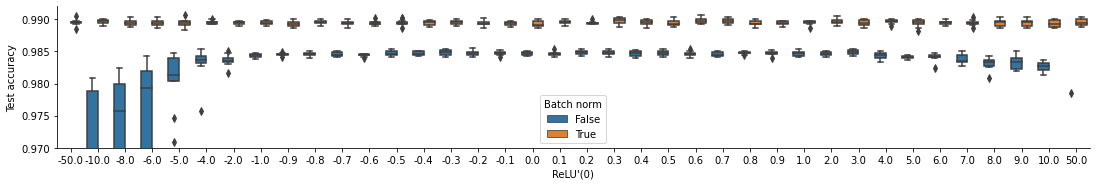

In [30]:
plt.figure(num=None, figsize=(2, 4), facecolor='w', edgecolor='k')
g = sns.catplot(x="relu", y="test_accuracy", hue="batch_norm", kind="box", data=df, height=2.5, aspect=6)
g._legend.remove()
plt.ylim(bottom=0.97, top=0.992)
plt.xlabel("ReLU'(0)")#, fontsize='25');
plt.ylabel('Test accuracy')#, fontsize='25');
plt.legend(title = "Batch norm")

plt.savefig('plots/MNISTTest.pdf', bbox_inches='tight')

<Figure size 1080x360 with 0 Axes>

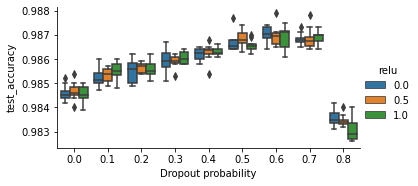

In [31]:
df = pd.read_csv('additional_experiments_mnist/mnist_sgd_dropout_and_relu.csv')
df=df[(df['relu'] > -1.1) &(df['relu'] < 1.1) ]
df=df[df['epoch'] == 199]
df = df[df['dropout']!= 0.9]
fig = plt.figure(figsize=(15,5))
sns.catplot(x="dropout", y="test_accuracy", hue="relu", kind="box", data=df, height=2.5, aspect=2)
#plt.ylim(bottom=0.983, top=0.992)
plt.xlabel("Dropout probability")#, fontsize='25');
plt.ylabel('test_accuracy')#, fontsize='25');
plt.savefig('plots/MNISTDropout.pdf', bbox_inches='tight')

In [32]:
df = pd.read_csv('additional_experiments_mnist/mnist_sgd.csv')
#df['batch_norm'] = df['batch_norm'].apply(lambda x: not x)
df = df[df['batch_norm'] == False]
reluToKeep = [-10, 0, 0.5,1, 10.0]
df = df[df.relu.isin(reluToKeep)]

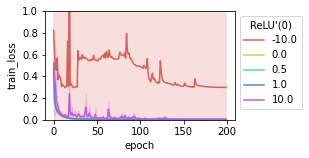

In [33]:

sizeFig = 2

fig = plt.figure(num=None, figsize=(sizeFig*1.7, sizeFig), facecolor='w', edgecolor='k')
sns.lineplot(x="epoch", y="train_loss", hue="relu", ci= 'sd', 
             data=df, palette=sns.color_palette("hls", len(df['relu'].unique())))
plt.xlabel("epoch")#, fontsize='25');
plt.ylabel('train_loss')#, fontsize='25');
plt.ylim(bottom=0, top=1)
plt.legend(title = "ReLU'(0)", ncol=1, bbox_to_anchor=(1, 1))
plt.savefig('plots/MNISTTrainNoBatch.pdf', bbox_inches='tight')

In [34]:
def plot_volume_estimation(df, max_size, batch_norm=False, batch_size=128):
    
    df = df[df['batchnorm']==batch_norm]
    
    df32 = df[df['precision'] == 32]
    max_len = len(df32.run_id.unique())
    df32 = df32[['batch_idx', 'same']].groupby(['batch_idx']).sum().reset_index()
    
    df32['div'] = (max_len-df32['same'])/max_len
    for i in range(df32.batch_idx.count(), max_size):
        df32 = df32.append({"div": 1.,
                            "same": max_len,
                            "batch_idx": i}, ignore_index=True)
    df32['batch_idx'] = df32['batch_idx'] * batch_size
    
    df16 = df[df['precision'] == 16]
    max_len = len(df16.run_id.unique())
    df16 = df16[['batch_idx', 'same']].groupby(['batch_idx']).sum().reset_index()
    
    df16['div'] = (max_len-df16['same'])/max_len
    for i in range(df16.batch_idx.count(), max_size):
        df16 = df16.append({"div": 1.,
                            "same": max_len,
                            "batch_idx": i}, ignore_index=True)
    df16['batch_idx'] = df16['batch_idx'] * batch_size
    df16 = df16.astype({"div":float})
    df32 = df32.astype({"div":float})
    
    sizeFig=1.5
    plt.figure(figsize=(sizeFig*1.7, sizeFig))
    plt.plot(df32['batch_idx'], df32['div'].values, label='32b')
    plt.plot(df16['batch_idx'], df16['div'].values, label='16b')
    plt.fill_between(df32['batch_idx'].values, df32['div'].values)
    plt.fill_between(df32['batch_idx'].values, df16['div'].values,df32['div'].values)
    leg = plt.legend(title="Precision", borderpad=0.4, borderaxespad=0.,handlelength=0.7)#, fontsize='25', title_fontsize='25')
    plt.xlabel('sample size')#, fontsize='25');
    plt.ylabel(r'$P(\theta \in S_{01})$')#, fontsize='30');plt.yticks(fontsize='25');

    for line in leg.get_lines():
        line.set_linewidth(10.0)

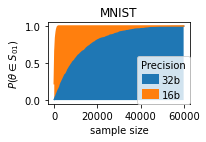

In [35]:
df = pd.read_csv('additional_experiments_mnist/volume_estimation_sample_MNIST.csv')
plot_volume_estimation(df, 600, batch_norm=0, batch_size=100)
plt.title("MNIST")
plt.savefig('plots/MNISTVolNoBatch.pdf', bbox_inches='tight')

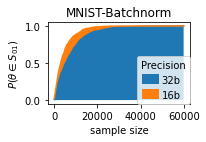

In [36]:
plot_volume_estimation(df, 600, batch_norm=1, batch_size=100)
plt.title("MNIST-Batchnorm")
plt.savefig('plots/MNISTVolBatch.pdf', bbox_inches='tight')